# Data Storytelling
This notebook is for the purpose of data storytelling. In other words, to highlight key first insights about the analysis prior to building a predictive model.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Allows better display of DataFrames
from IPython.display import display

# Create DataFrame from CSV file
df = pd.read_csv('countries_clean.csv')

In [32]:
df.head(5)

,Unnamed: 0,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,0,Afghanistan,Middle East/Central Asia,29.82,0.46,614.66,0.30,0.20,0.08,0.18,...,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6
1,1,Albania,Northern/Eastern Europe,3.16,0.73,4534.37,0.78,0.22,0.25,0.87,...,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6
2,2,Algeria,Africa,38.48,0.73,5430.57,0.60,0.16,0.17,1.14,...,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5
3,3,Angola,Africa,20.82,0.52,4665.91,0.33,0.15,0.12,0.20,...,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.37,6
4,5,Argentina,Latin America,41.09,0.83,13540.00,0.78,0.79,0.29,1.08,...,2.64,1.86,0.66,1.67,0.10,6.92,3.78,1.82,0.45,6


### Carbon Footprint vs. Population

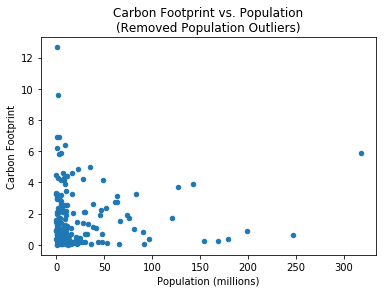

In [33]:
df1 = df[df['Population (millions)'] < 1000]

df1.plot.scatter(x='Population (millions)',
                y='Carbon Footprint')
plt.title('Carbon Footprint vs. Population\n(Removed Population Outliers)')

plt.show()

In [34]:
cropFoot = df['Cropland Footprint']
grazeFoot = df['Grazing Footprint']
forestFoot = df['Forest Footprint']
carbonFoot = df['Carbon Footprint']
fishFoot = df['Fish Footprint']
indx = np.arange(5)

plt.figure(figsize=(10,7))

barCropFoot = plt.bar(x=indx, height=cropFoot, width=0.35, left=True)
barGrazeFoot = plt.bar(x=indx, height=grazeFoot, width=0.35, bottom=barCropFoot)
barForestFoot = plt.bar(x=indx, height=forestFoot, width=0.35, bottom=barGrazeFoot+barCropFoot)
barCarbonFoot = plt.bar(x=indx, height=carbonFoot, width=0.35, bottom=barForestFoot+barGrazeFoot+barCropFoot)
barFishFoot = plt.bar(x=indx, height=fishFoot, width=0.35, bottom=barCarbonFoot+barForestFoot+barGrazeFoot+barCropFoot)

plt.xlabel('Footprints')
plt.ylabel('Footprints')

plt.show()

ValueError: incompatible sizes: argument 'height' must be length 1 or scalar